In [11]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib inline

import os
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
root = r'C:\Users\Aulamultimedia\MEGA\Especializacion en Inteligencia Artificial UBA\Materias\Bimestre 2\Vision por Computadora 1\vision_computadora_I\Material_TPs\TP3'

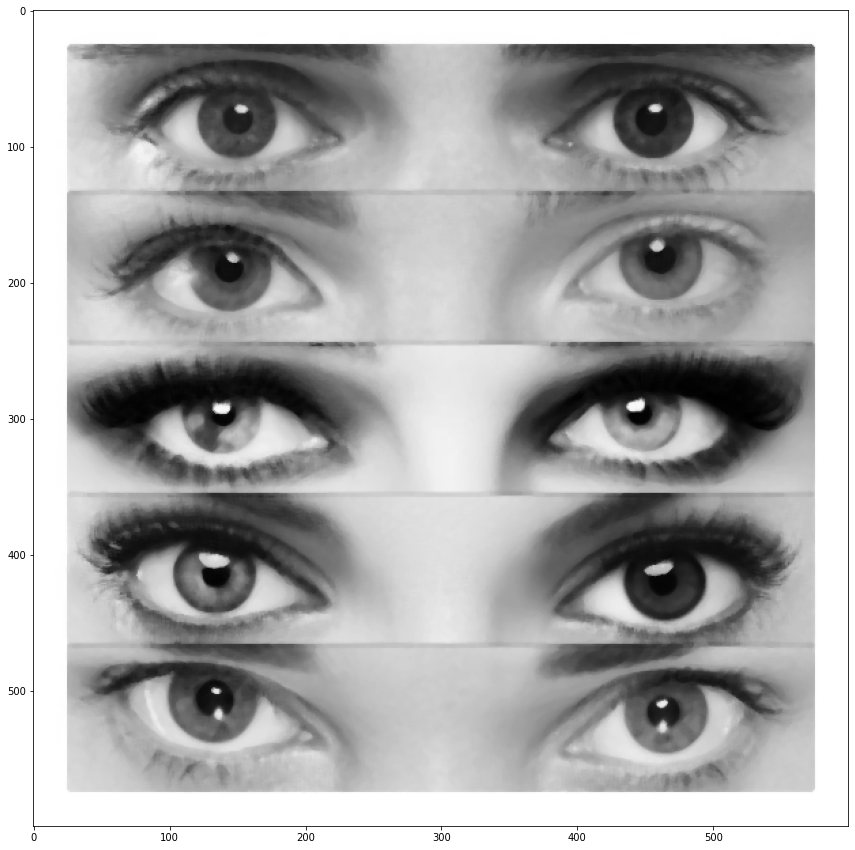

In [25]:
%matplotlib inline
# Leemos la imagen

img = cv.imread(os.path.join(root,'eyes.jpg'))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_unblured = gray.copy()
# Suavizamos la imagen

gray = cv.medianBlur(gray,5)
gray_blured = cv.medianBlur(gray,9)

#cv.imshow('ojos',gray)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.figure(figsize= (15,15))
plt.imshow(gray, cmap='gray')
plt.show()


[[144.5 189.5  31.1]
 [455.5  78.5  29.7]
 [464.5 418.5  30.2]
 [132.5 503.5  34.4]
 [464.5 514.5  31.3]
 [460.5 181.5  31.3]
 [149.5  79.5  29.6]
 [134.5 412.5  31. ]
 [450.5 287.5  36.9]
 [137.5 298.5  27.7]]
(10, 3)


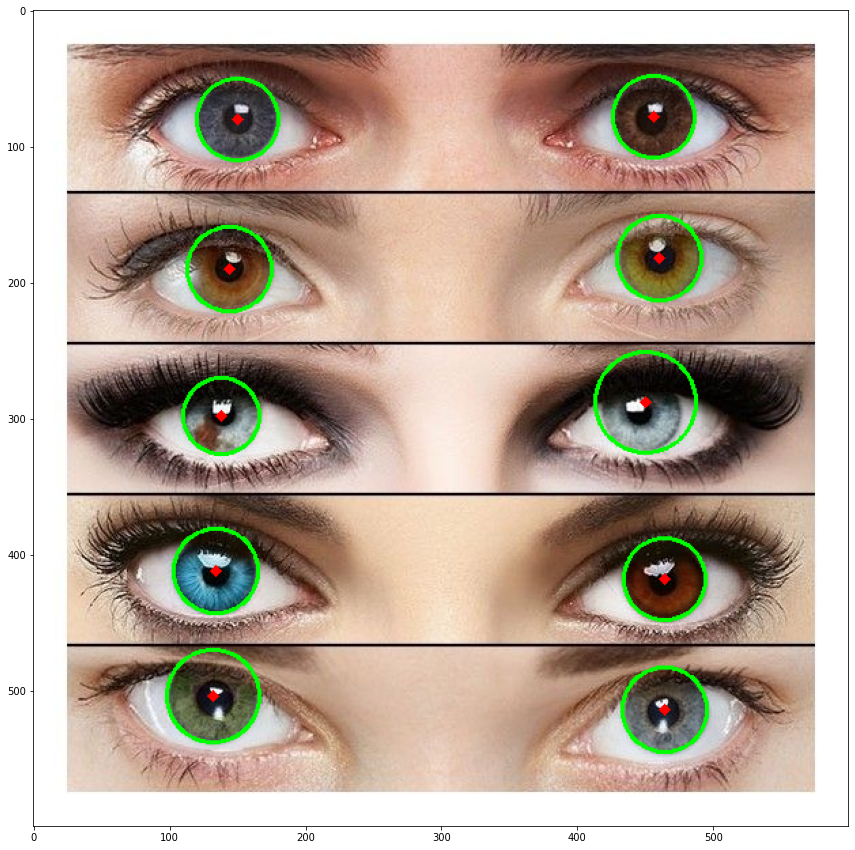

In [28]:
%matplotlib inline
# Obtenemos los círculos 
img_out = img.copy()
rad_min = 15
rad_max = 54
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=40,param1=120,param2=34,minRadius=rad_min,maxRadius=rad_max)
print(circles[0,:])
print(circles[0,:].shape)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
#cv.imshow('detected circles',img_out)
#cv.waitKey(0)
#cv.destroyAllWindows()
img_rgb = cv.cvtColor(img_out, cv.COLOR_BGR2RGB)
plt.figure(figsize= (15,15))
plt.imshow(img_rgb)
plt.show()

In [14]:
# Ordeno los ojos en pares dividiendo en derechos e izquierdos y luego ordenando por eje Y
#ordenados = np.sort(circles[0,:], axis = 0)
izquierdos = np.array([circles[:,0,:],circles[:,6,:],circles[:,7,:],circles[:,3,:],circles[:,9,:]])
#izquierdos2 = ordenados2[4:8]
#izquierdos2 = np.sort(izquierdos2, axis = 1)
derechos= np.array([circles[:,5,:],circles[:,1,:],circles[:,2,:],circles[:,4,:],circles[:,8,:]])

In [15]:
#derechos = ordenados[0:5]
#derechos = np.sort(derechos, axis = 1)


# FINALMENTE ORDENO DE LA FORMA MAS INTUITIVA

In [16]:
#izquierdos = ordenados[5:10]
#izquierdos = np.sort(izquierdos, axis = 1)

In [17]:
for i in range(0,5):
    print('OJOS {}: la distancia entre ambos iris es {} píxeles'.format(i+1, derechos[i][0][0]-izquierdos[i][0][0]))

OJOS 1: la distancia entre ambos iris es 316 píxeles
OJOS 2: la distancia entre ambos iris es 306 píxeles
OJOS 3: la distancia entre ambos iris es 330 píxeles
OJOS 4: la distancia entre ambos iris es 332 píxeles
OJOS 5: la distancia entre ambos iris es 312 píxeles


[[132.5 505.5  13.6]
 [463.5 515.5  11.8]
 [454.5  79.5  11.6]
 [149.5  79.5  11.1]
 [445.5 294.5  10.2]
 [460.5 180.5  12.5]
 [143.5 188.5  10.2]
 [138.5 294.5  11.1]]
(8, 3)


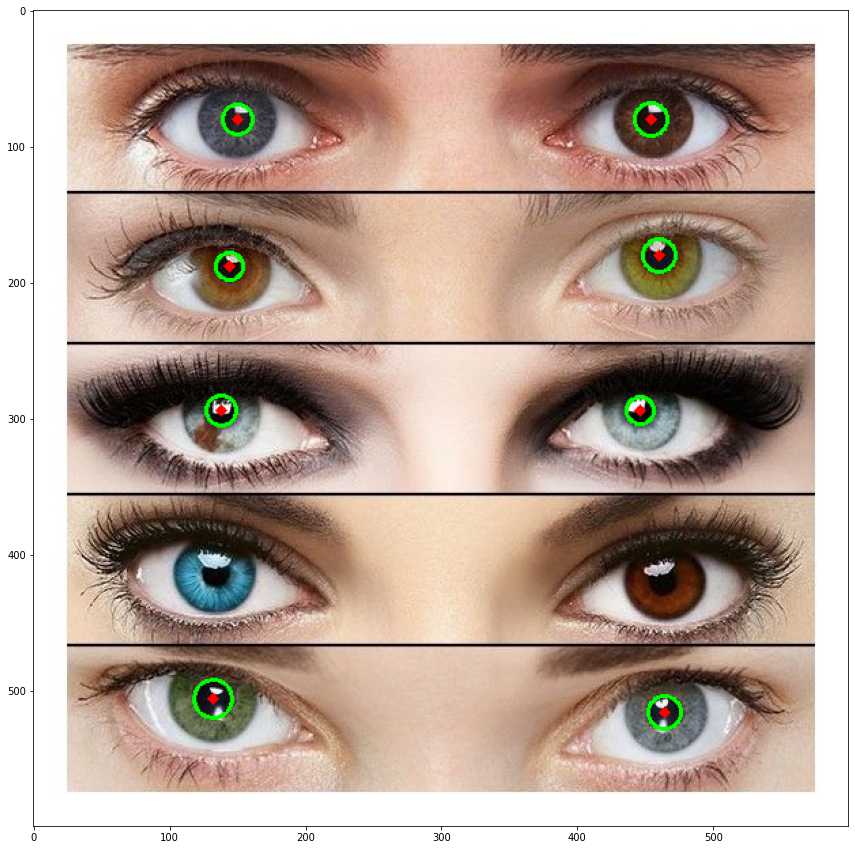

In [29]:
# Repito lo mismo para las pupilas, reduciendo el radio mínimo y máximo del algoritmo
%matplotlib inline
# Obtenemos los círculos 
img_out2 = img.copy()
rad_min = 8
rad_max = 19
circles2 = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=100,param1=190,param2=18,minRadius=rad_min,maxRadius=rad_max)
print(circles2[0,:])
print(circles2[0,:].shape)

circles2 = np.uint16(np.around(circles2))
for i in circles2[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out2,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out2,(i[0],i[1]),2,(0,0,255),3)


#cv.imshow('detected circles',img_out2)
#cv.waitKey(0)
#cv.destroyAllWindows()
img_rgb2 = cv.cvtColor(img_out2, cv.COLOR_BGR2RGB)
plt.figure(figsize= (15,15))
plt.imshow(img_rgb2)
plt.show()

In [19]:
# Veo que detecté 4 de los 5 pares de ojos y es lo mejor que pude obtener jugando con los parámetros...
# Repito lo anterior pero sólo para estos valores


In [20]:
#ordenados2 = np.sort(circles2[0,:], axis = 0)
#derechos2 = ordenados2[0:4]
#derechos2 = np.sort(derechos2, axis = 1)
derechos2 = np.array([circles2[:,1,:],circles2[:,2,:],circles2[:,4,:],circles2[:,5,:]])
#izquierdos2 = ordenados2[4:8]
#izquierdos2 = np.sort(izquierdos2, axis = 1)
izquierdos2= np.array([circles2[:,0,:],circles2[:,3,:],circles2[:,7,:],circles2[:,6,:]])
for i in range(0,4):
    print('OJOS {}: la distancia entre ambas pupilas es {} píxeles'.format(i+1, derechos2[i][0][0]-izquierdos2[i][0][0]))


OJOS 1: la distancia entre ambas pupilas es 332 píxeles
OJOS 2: la distancia entre ambas pupilas es 304 píxeles
OJOS 3: la distancia entre ambas pupilas es 308 píxeles
OJOS 4: la distancia entre ambas pupilas es 316 píxeles
